In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
%config Completer.use_jedi = False

In [2]:
# Info
# 2021.07.26 ChanHyukLee
# Reference : https://kaggle-kr.tistory.com/17?category=868316

In [3]:
plt.style.use('seaborn')
sns.set(font_scale=2.5)

In [4]:
import missingno as msno
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

# Dataset Check

In [5]:
df_train= pd.read_csv('./Dataset/train.csv')
df_test = pd.read_csv('./Dataset/test.csv')

In [6]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
for col in df_train.columns:
    print(col)
    # :>10 means the right sort and the Maximum length of the word is 1s
    msg = 'column : {:>10}\t percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

PassengerId
column : PassengerId	 percent of NaN value: 0.00%
Survived
column :   Survived	 percent of NaN value: 0.00%
Pclass
column :     Pclass	 percent of NaN value: 0.00%
Name
column :       Name	 percent of NaN value: 0.00%
Sex
column :        Sex	 percent of NaN value: 0.00%
Age
column :        Age	 percent of NaN value: 19.87%
SibSp
column :      SibSp	 percent of NaN value: 0.00%
Parch
column :      Parch	 percent of NaN value: 0.00%
Ticket
column :     Ticket	 percent of NaN value: 0.00%
Fare
column :       Fare	 percent of NaN value: 0.00%
Cabin
column :      Cabin	 percent of NaN value: 77.10%
Embarked
column :   Embarked	 percent of NaN value: 0.22%


In [9]:
for col in df_test.columns:
    print(df_test.columns)
    msg = 'column : {:>10}\t percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
column : PassengerId	 percent of NaN value: 0.00%
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
column :     Pclass	 percent of NaN value: 0.00%
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
column :       Name	 percent of NaN value: 0.00%
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
column :        Sex	 percent of NaN value: 0.00%
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
column :        Age	 percent of NaN value: 20.57%
Index(['PassengerId', 'Pclass', 'Name', 'Sex', '

<AxesSubplot:>

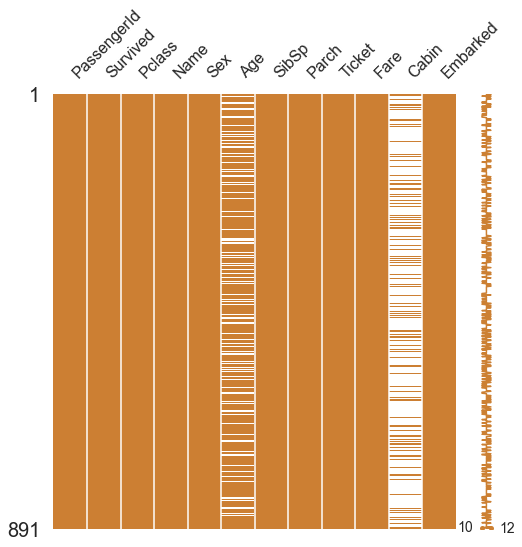

In [10]:
msno.matrix(df = df_train.iloc[:,:], figsize=(8,8), color=(0.8, 0.5, 0.2))

# Target Label check

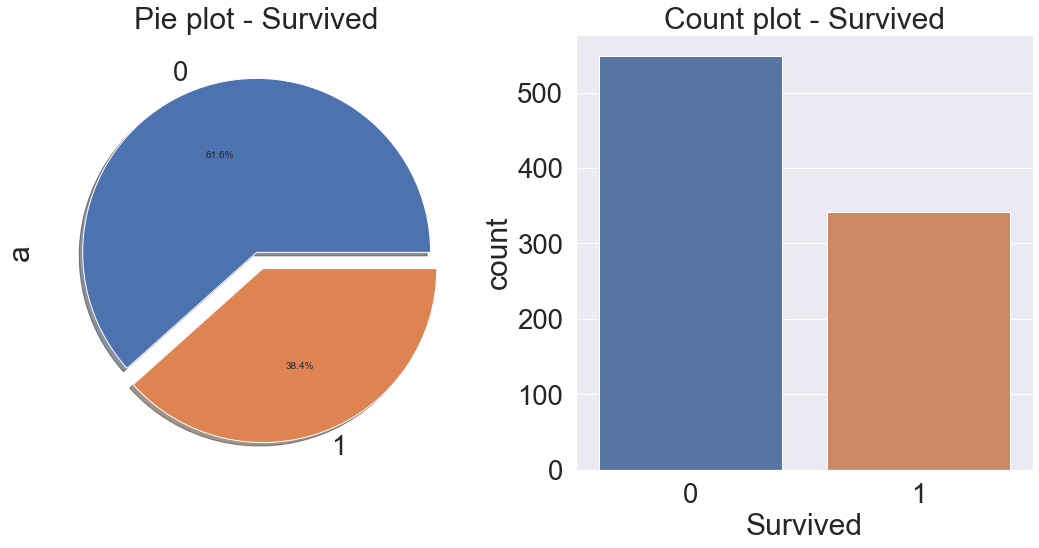

In [11]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('a')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

# Data analysis

In [12]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [13]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [14]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass'>

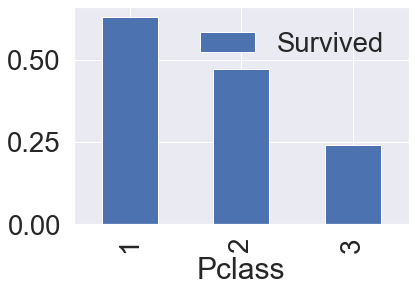

In [27]:
# groupby의 as_index는 True일 경우 특정 클래스로 묶고 남은 애들을 단순히 수치로 나타내고, Flase일 경우 특정 클래스를 제일 앞에 나타내고 나머지애들을 뒤에
# sort_values는 특정 클래스를 중심으로 묶는 것. 그럼 groupby랑 병행해야만 하는건가?
df_train[['Pclass' , 'Survived']].groupby(['Pclass'], as_index = True).mean().sort_values(by='Survived', ascending=False).plot.bar()

Text(0.5, 1.02, 'Pclass: Survived vs Dead')

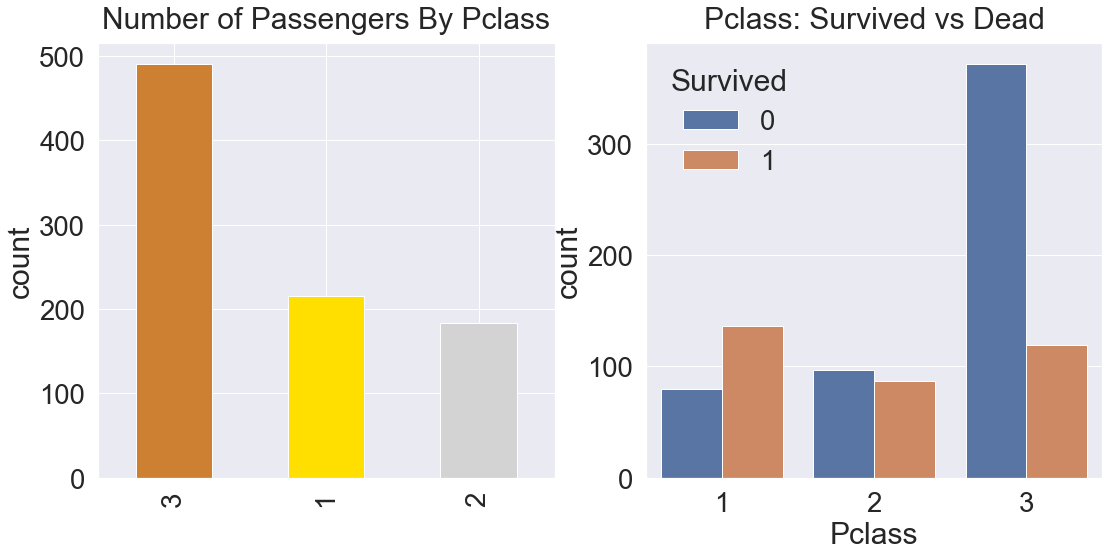

In [35]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title("Number of Passengers By Pclass", y=y_position)
ax[0].set_ylabel('count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)

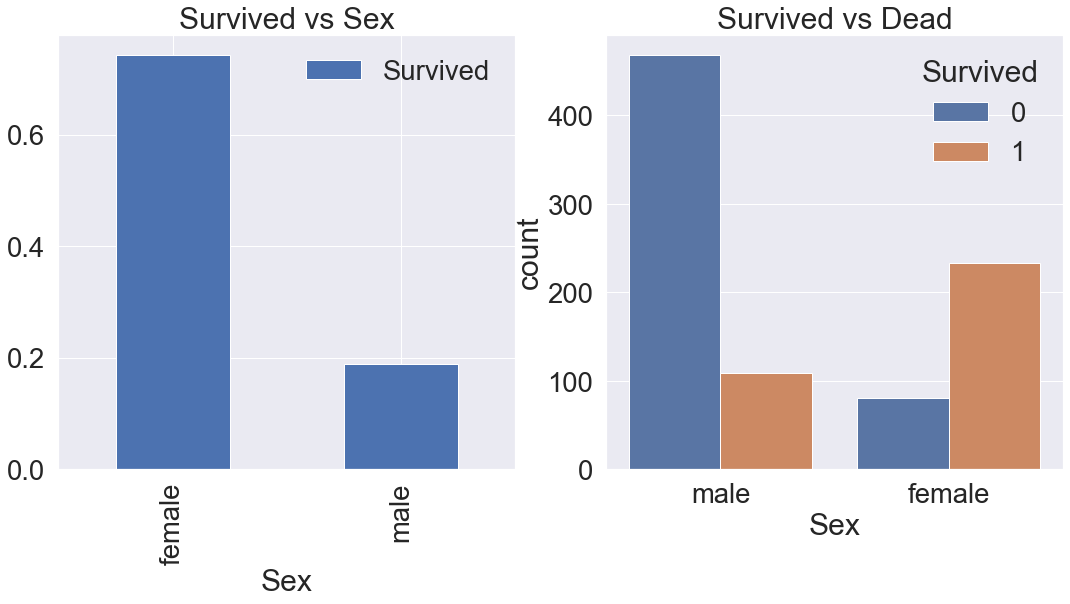

In [46]:
f, ax = plt.subplots(1,2, figsize = (18,8))
df_train[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Survived vs Dead')
plt.show()

In [50]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [53]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


,Survived,Pclass
1,1,1.950292
0,0,2.531876


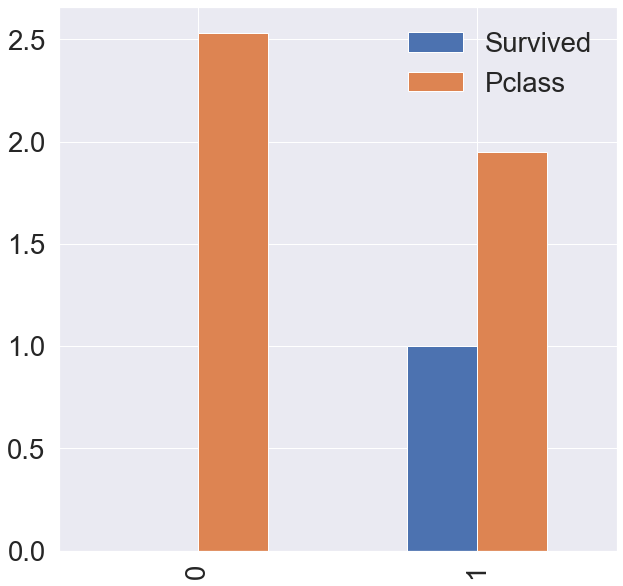

In [61]:
f, ax = plt.subplots(1,1, figsize=(10,10))
df_train[['Survived', 'Pclass', 'Sex']].groupby(['Survived'], as_index=False).mean().plot.bar(ax=ax)
df_train[['Survived', 'Pclass', 'Sex']].groupby(['Survived'], as_index=False).mean().sort_values(by='Survived', ascending=False)

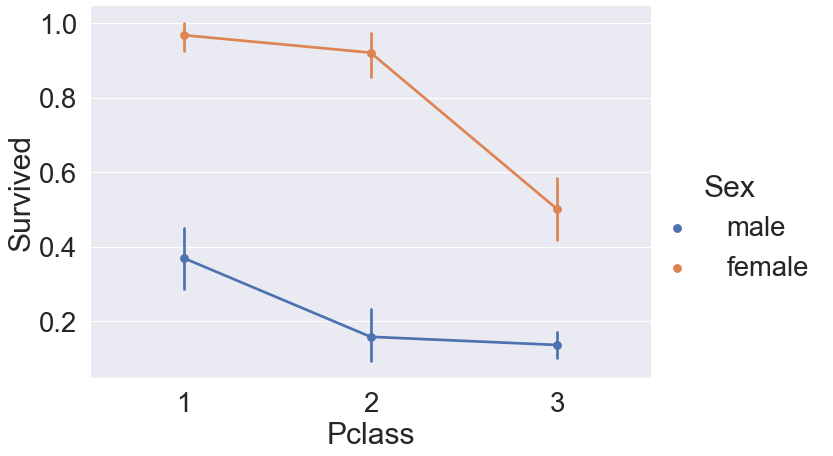

In [65]:
sns.factorplot(x= 'Pclass', y= 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

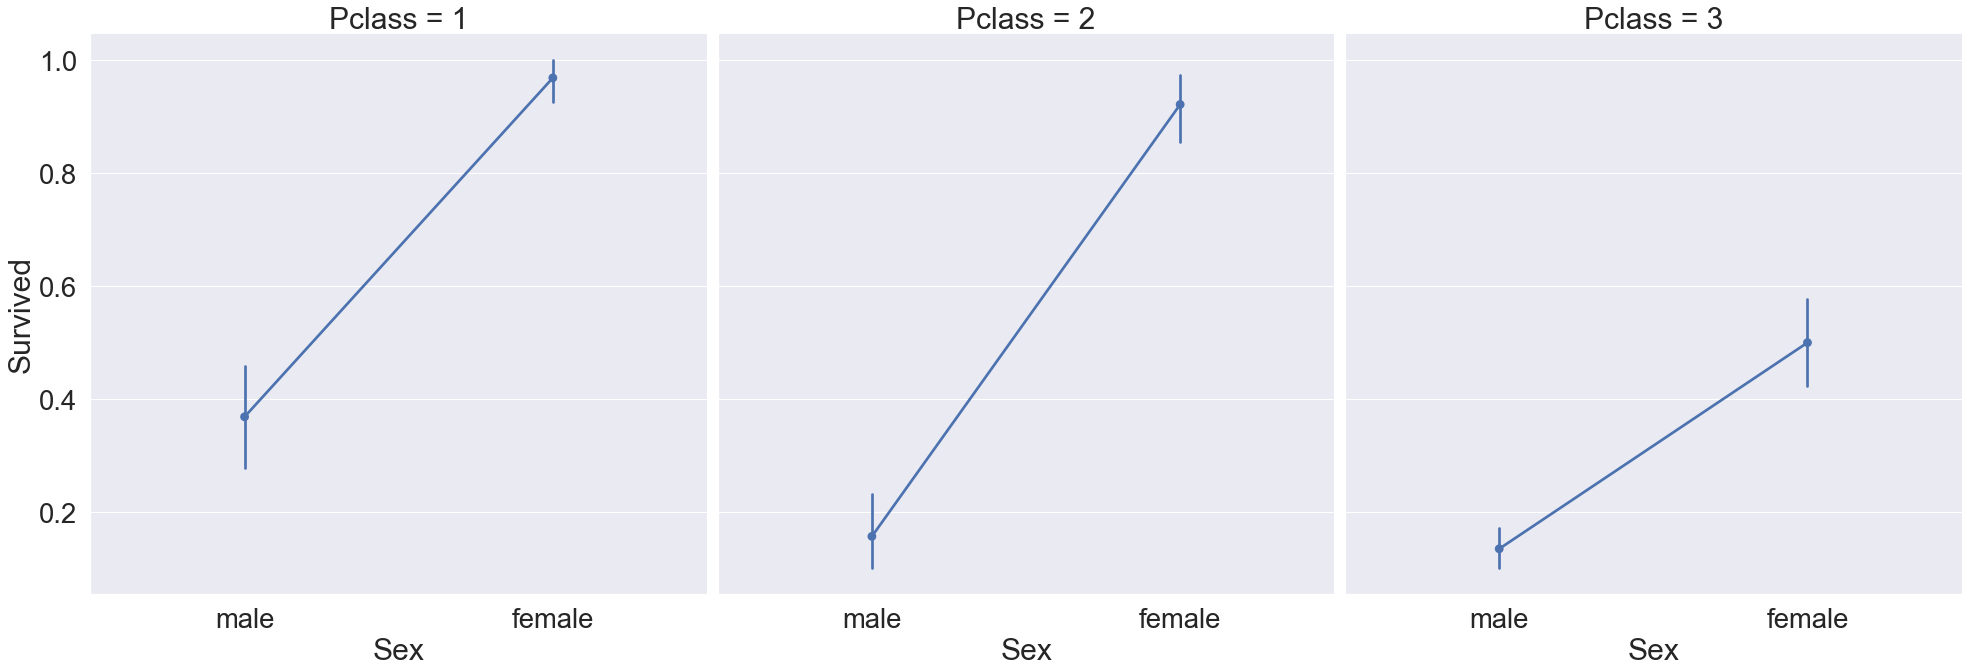

In [68]:
sns.factorplot(x='Sex', y='Survived', col='Pclass', data=df_train, satureation=.5, size=9, aspect=1)

In [70]:
print('{:>10} {:.1f} Years'.format('제일 나이 많은 탑승객 : ', df_train['Age'].max()))
print('{:>10} {:.1f} Years'.format('제일 나이 적은 탑승객 : ', df_train['Age'].min()))

제일 나이 많은 탑승객 :  80.0 Years
제일 나이 적은 탑승객 :  0.4 Years
